In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import dataset packages
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

# import from project files
from utils import plot_2d, plot_classifier_boundary

In [26]:
# create datasets

# for LDA we need Gaussian distribution (important assumption!)
# LDA works when all the independent/predictor variables are continuous (not categorical) and follow a Normal distribution.

# LogReg should not be used if the number of observations is lesser than the number of features, otherwise, it may lead to overfitting
# logreg assumes binary classification
# Hence, it is assumed that logistic regression is the more flexible and more robust method in case of violations of these assumptions



## Logistic Regression ##

- Based on Maximum likelihood estimation
- 


Assumptions: 
- By default, logistic regression assumes that the outcome variable is binary (see: https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290)
- Linearity of independent variables and log-odds
- Logistic regression assumes that there are no highly influential outlier data points, as they distort the outcome and accuracy of the model
- When the classes are well-separated, the parameter estimates for logistic regression are surprisingly unstable. Coefficients may go to infinity. LDA doesn't suffer from this problem. --> If there are covariate values that can predict the binary outcome perfectly then the algorithm of logistic regression, i.e. Fisher scoring, does not even converge. This is the extreme case of perfect separation but even if the data are only separated to a great degree and not perfectly, the maximum likelihood estimator might not exist and even if it does exist, the estimates are not reliable.(see: https://stats.stackexchange.com/questions/188416/discriminant-analysis-vs-logistic-regression)
- 

- No assumption about distribution and in-group covariance of predictors.

Advantages: 
- Groups can have different n
- Not too sensitive to outliers (See: https://stats.stackexchange.com/questions/95247/logistic-regression-vs-lda-as-two-class-classifiers)


Disadvantages:
- main differences to LDA with small samples, as their distributions vary too much for the LR to be  able  to  give  good  result


## LDA ##

- Based on Least squares estimation


Assumptions:
- Distributional assumptions (multivariate normality of all predictors). Non-multivariate normally distributed predictors will even hurt the discriminant extraction phase.
- The within-group covariance matrices should be identical in population. (See: https://stats.stackexchange.com/questions/95247/logistic-regression-vs-lda-as-two-class-classifiers)
- 

Advantages: 
- po

Disadvantages: 
- Groups should have similar n
- Quite sensitive ti outliers

In [1]:
# add outliers
# unbalanced sample sizes --> different n

def data_lr():

    # lr_X, lr_y = make_blobs(
    #     n_samples=[700, 200], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=2, 
    #     cluster_std=[5, 4],
    #     random_state=1, 
    #     shuffle=False)

    # lr_X, lr_y = make_moons(
    #     n_samples=[600, 100], 
    #     noise=0.5)

    # lr - 0.99
    # lda - 0.96
    # lr_X, lr_y = make_classification(
    #     n_samples=500,
    #     n_features=2, 
    #     n_redundant=0, 
    #     n_informative=2, 
    #     n_clusters_per_class=1,
    #     weights=[0.8, 0.2],
    #     random_state=1
    #     )


    lr_X, lr_y = make_classification(
        n_samples=100,
        n_features=2, 
        n_redundant=0, 
        n_informative=2,
        class_sep=0.5,          # seperation of classes, default 1.0
        # flip_y=0.5,             # random class assignment, default 0.01
        weights=[0.9, 0.1],      # balance of classes
        random_state=42
        )

    return lr_X, lr_y

In [2]:
# make gaussian distribution
# no outliers
# balanced sample sizes --> similar n

def data_lda():
    
    lda_X, lda_y = make_blobs(
        n_samples=[15, 15], 
        centers=[(2,5),(8,5)],             
        n_features=2, 
        cluster_std=[1, 1],
        random_state=1, 
        shuffle=False)

    # lda_X, lda_y =  make_classification(
    #     n_samples=600,
    #     n_features=2,
    #     n_redundant=0,
    #     n_informative=2,
    #     random_state=2,
    #     n_clusters_per_class=1,
    # ),

    # lda_X, lda_y = make_moons(
    #     n_samples=[100, 100], 
    #     noise=0.1)
                    
    return lda_X, lda_y

In [3]:
# LogReg data generation and splitup
lr_X, lr_y = data_lr()
plot_2d(lr_X, lr_y, 'LogReg dataset')

lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(lr_X, lr_y, test_size=.33, random_state=42)

# LDA data generation and splitup
lda_X, lda_y = data_lda()
plot_2d(lda_X, lda_y, 'LDA dataset')

lda_X_train, lda_X_test, lda_y_train, lda_y_test = train_test_split(lda_X, lda_y, test_size=.33, random_state=42)


NameError: name 'make_classification' is not defined

LogReg score on LR dataset: 0.80


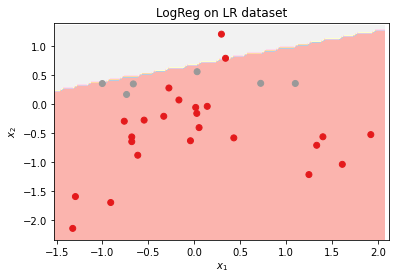

In [ ]:
# LogReg

logreg = LogisticRegression()
logreg.fit(lr_X_train, lr_y_train)

print('LogReg score on LR dataset: %.2f' % (logreg.score(lr_X_test, lr_y_test)))
plot_classifier_boundary(logreg, lr_X, lr_y, title='LogReg on LR dataset')

# plot log line
# cmap = colors.ListedColormap(['blue','orange'])
# x_show=np.arange(-1,1,0.01)
# y_show=logreg.predict(x_show[:,np.newaxis])  # ValueError: X has 1 features, but LogisticRegression is expecting 2 features as input.
# plt.scatter(lr_X, lr_y,color=cmap(lr_y))
# plt.plot(x_show,y_show,color='red')
# plt.plot(x_show,[0.5]*len(x_show),color='grey')

# expy=np.exp(logreg.intercept_+logreg.coef_[0]*x_show)
# plt.plot(x_show,expy/(1+expy),color='purple')
# plt.legend(['predict','0.5','logistic function'])

LogReg score on LDA dataset: 1.00


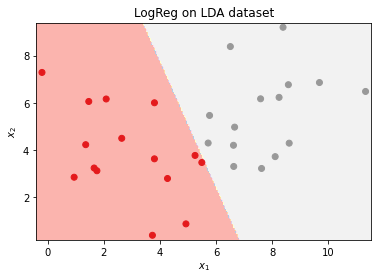

In [ ]:
# LogReg

logreg = LogisticRegression()
logreg.fit(lda_X_train, lda_y_train)

print('LogReg score on LDA dataset: %.2f' % (logreg.score(lda_X_test, lda_y_test)))
plot_classifier_boundary(logreg, lda_X, lda_y, title='LogReg on LDA dataset')

LDA score on LDA dataset: 1.00


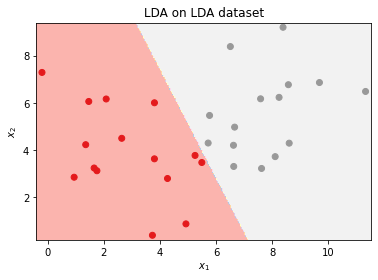

In [ ]:
# LDA

lda = LDA()
lda.fit(lda_X_train, lda_y_train)

print('LDA score on LDA dataset: %.2f' % (lda.score(lda_X_test, lda_y_test)))
plot_classifier_boundary(lda, lda_X, lda_y, title='LDA on LDA dataset')

LDA score on LR dataset: 0.80


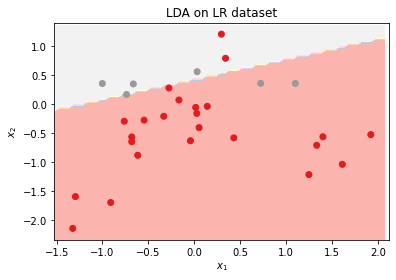

In [ ]:
# LDA

lda = LDA()
lda.fit(lr_X_train, lr_y_train)

print('LDA score on LR dataset: %.2f' % (lda.score(lr_X_test, lr_y_test)))
plot_classifier_boundary(lda, lr_X, lr_y, title='LDA on LR dataset')


In [ ]:
repeats = 10
logreg_scores = []
for k in range(repeats):
    model = LogisticRegression()
    model.fit(lr_X_train, lr_y_train)
    logreg_scores.append(model.score(lr_X_test, lr_y_test))

logreg_scores = np.array(logreg_scores)
print('Logitic Regression scores:', logreg_scores)
# LogReg models always get same score for same dataset


Logitic Regression scores: [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
